<a href="https://colab.research.google.com/github/EstevaoDev/estevaodev.github.io/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,Rafael Costa,SP,4,cartao_credito,3,-22.19,-48.79
1,Cama box,moveis,631.70,33.919251,03/01/2020,Thiago Silva,GO,5,cartao_credito,2,-15.98,-49.86
2,Bola de basquete,esporte e lazer,31.54,0.000000,25/12/2022,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
3,Modelagem preditiva,livros,76.93,1.680730,23/11/2021,Lucas Oliveira,MG,3,boleto,1,-18.10,-44.38
4,Fone de ouvido,eletronicos,185.14,7.442587,25/04/2022,Bianca Santos,SP,4,cartao_credito,7,-22.19,-48.79


#1. Análise do faturamento


In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

lojas = [loja, loja2, loja3, loja4]

for i, df in enumerate(lojas, start=1):
    faturamento = df["Preço"].sum()
    print(f"Faturamento total da Loja {i}: R$ {faturamento:.2f}")

Faturamento total da Loja 1: R$ 1534509.12
Faturamento total da Loja 2: R$ 1488459.06
Faturamento total da Loja 3: R$ 1464025.03
Faturamento total da Loja 4: R$ 1384497.58


# 2. Vendas por Categoria


In [ ]:
lojas = [loja, loja2, loja3, loja4]

for i, df in enumerate(lojas, start=1):
    if "Categoria do Produto" in df.columns:
        categorias_vendas = df.groupby("Categoria do Produto")["Produto"].count().reset_index()
        categorias_vendas = categorias_vendas.sort_values(by="Produto", ascending=False)

        print(f"\nLoja {i}: Categorias mais populares")
        print(categorias_vendas)
    else:
        print(f"\nErro na Loja {i}: Coluna 'Categoria do Produto' não encontrada!")


Loja 1: Categorias mais populares
    Categoria do Produto  Produto
6                 moveis      465
2            eletronicos      448
0             brinquedos      324
1       eletrodomesticos      312
3        esporte e lazer      284
4  instrumentos musicais      182
5                 livros      173
7  utilidades domesticas      171

Loja 2: Categorias mais populares
    Categoria do Produto  Produto
6                 moveis      442
2            eletronicos      422
0             brinquedos      313
1       eletrodomesticos      305
3        esporte e lazer      275
4  instrumentos musicais      224
5                 livros      197
7  utilidades domesticas      181

Loja 3: Categorias mais populares
    Categoria do Produto  Produto
6                 moveis      499
2            eletronicos      451
0             brinquedos      315
1       eletrodomesticos      278
3        esporte e lazer      277
5                 livros      185
4  instrumentos musicais      177
7  utilidad

# 3. Média de Avaliação das Lojas

In [ ]:
lojas = [loja, loja2, loja3, loja4]

for i, df in enumerate(lojas, start=1):
    if "Avaliação da compra" in df.columns:
        media_avaliacao = df["Avaliação da compra"].mean()
        print(f"Média de avaliação da Loja {i}: {media_avaliacao:.2f}")
    else:
        print(f"Erro na Loja {i}: Coluna 'Avaliação da compra' não encontrada!")

Média de avaliação da Loja 1: 3.98
Média de avaliação da Loja 2: 4.04
Média de avaliação da Loja 3: 4.05
Média de avaliação da Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [ ]:
lojas = [loja, loja2, loja3, loja4]

for i, df in enumerate(lojas, start=1):
    if "Produto" in df.columns:
        vendas_por_produto = df["Produto"].value_counts().reset_index()
        vendas_por_produto.columns = ["Produto", "Quantidade Vendida"]

        print(f"\nLoja {i}:")
        print(f"🔝Mais vendido: {vendas_por_produto.iloc[0]['Produto']} ({vendas_por_produto.iloc[0]['Quantidade Vendida']} unidades)")
        print(f"🔻Menos vendido: {vendas_por_produto.iloc[-1]['Produto']} ({vendas_por_produto.iloc[-1]['Quantidade Vendida']} unidades)")
        print("\nTop 5 produtos mais vendidos:")
        print(vendas_por_produto.head())
    else:
        print(f"\nErro na Loja {i}: Coluna 'Produto' não encontrada!")


Loja 1:
🔝Mais vendido: Micro-ondas (60 unidades)
🔻Menos vendido: Celular ABXY (33 unidades)

Top 5 produtos mais vendidos:
              Produto  Quantidade Vendida
0         Micro-ondas                  60
1       TV Led UHD 4K                  60
2       Guarda roupas                  60
3  Secadora de roupas                  58
4              Cômoda                  56

Loja 2:
🔝Mais vendido: Iniciando em programação (65 unidades)
🔻Menos vendido: Jogo de tabuleiro (32 unidades)

Top 5 produtos mais vendidos:
                    Produto  Quantidade Vendida
0  Iniciando em programação                  65
1               Micro-ondas                  62
2                   Bateria                  61
3                    Violão                  58
4                  Pandeiro                  58

Loja 3:
🔝Mais vendido: Kit banquetas (57 unidades)
🔻Menos vendido: Blocos de montar (35 unidades)

Top 5 produtos mais vendidos:
           Produto  Quantidade Vendida
0    Kit banquetas       

# 5. Frete Médio por Loja


In [ ]:
lojas = [loja, loja2, loja3, loja4]

for i, df in enumerate(lojas, start=1):
    if "Frete" in df.columns:
        custo_medio_frete = df["Frete"].mean()
        print(f"Média do custo de frete da Loja {i}: R$ {custo_medio_frete:.2f}")
    else:
        print(f"Erro na Loja {i}: Coluna 'Frete' não encontrada!")

Média do custo de frete da Loja 1: R$ 34.69
Média do custo de frete da Loja 2: R$ 33.62
Média do custo de frete da Loja 3: R$ 33.07
Média do custo de frete da Loja 4: R$ 31.28


# Gráficos


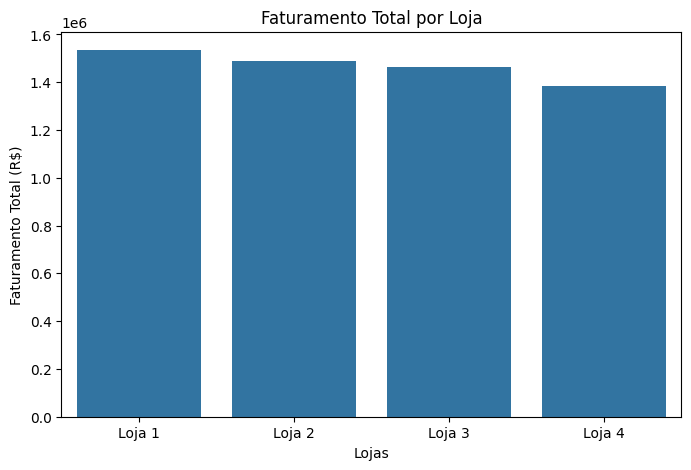

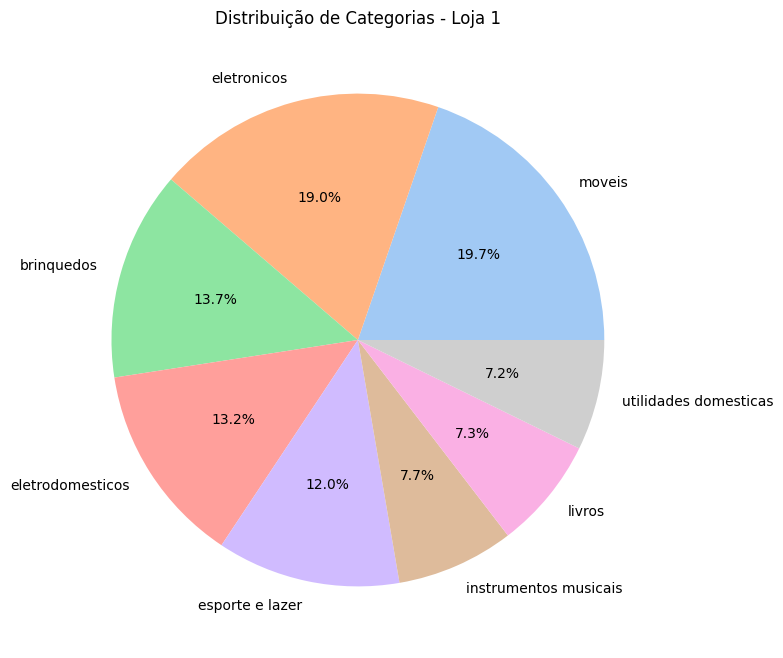

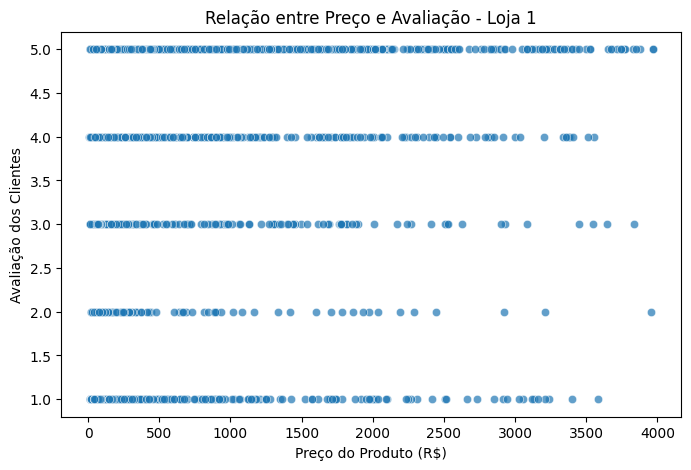

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Faturamento das lojas (Gráfico de Barras)
lojas = [loja, loja2, loja3, loja4]
faturamentos = [df["Preço"].sum() for df in lojas]
nomes_lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

plt.figure(figsize=(8, 5))
sns.barplot(x=nomes_lojas, y=faturamentos)
plt.xlabel("Lojas")
plt.ylabel("Faturamento Total (R$)")
plt.title("Faturamento Total por Loja")
plt.show()

print("\n" + "="*50 + "\n")  # Espaço entre gráficos

# Distribuição das Categorias de Produtos (Gráfico de Pizza para Loja 1)
if "Categoria do Produto" in loja.columns:
    categorias_vendas = loja["Categoria do Produto"].value_counts()

    plt.figure(figsize=(8, 8))
    plt.pie(categorias_vendas, labels=categorias_vendas.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
    plt.title("Distribuição de Categorias - Loja 1")
    plt.show()

print("\n" + "="*50 + "\n")  # Espaço entre gráficos

# Relação entre Preço e Avaliação (Gráfico de Dispersão para Loja 1)
if "Preço" in loja.columns and "Avaliação da compra" in loja.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=loja["Preço"], y=loja["Avaliação da compra"], alpha=0.7)
    plt.xlabel("Preço do Produto (R$)")
    plt.ylabel("Avaliação dos Clientes")
    plt.title("Relação entre Preço e Avaliação - Loja 1")
    plt.show()

#Relatório Final: Análise das Lojas do Senhor João

##Introdução

Este relatório tem como objetivo avaliar o desempenho das quatro lojas do Senhor João, considerando métricas-chave como faturamento, categorias mais vendidas, avaliações dos clientes, produtos de maior e menor saída e o custo médio de frete. Com base nas análises, será possível determinar qual loja apresenta menor potencial de lucratividade e deve ser vendida para otimizar o investimento.

##Análise Setorial
###Faturamento Total das Lojas

Os faturamentos das lojas são:

![Gráfico de Faturamento Total das Lojas](/content/sample_data/Faturamento_total_por_loja.png)

- Loja 1: R$ 1.534.509,12

- Loja 2: R$ 1.488.459,06

- Loja 3: R$ 1.464.025,03

- Loja 4: R$ 1.384.497,58

A Loja 4 apresenta o menor faturamento total, indicando um desempenho de vendas inferior em comparação com as demais.

###Categorias de Produtos Mais e Menos Vendidas

| Loja  | Categoria Mais Vendida | Quantidade | Categoria Menos Vendida | Quantidade |
|-------|------------------------|------------|------------------------|------------|
| Loja 1 | Móveis                | 465        | Livros                 | 173        |
| Loja 1 | Eletrônicos           | 448        | Utilidades Domésticas  | 171        |
| Loja 2 | Móveis                | 442        | Livros                 | 197        |
| Loja 2 | Eletrônicos           | 422        | Utilidades Domésticas  | 181        |
| Loja 3 | Móveis                | 499        | Livros                 | 185        |
| Loja 3 | Eletrônicos           | 451        | Utilidades Domésticas  | 177        |
| Loja 4 | Móveis                | 480        | Livros                 | 187        |
| Loja 4 | Eletrônicos           | 451        | Instrumentos Musicais  | 170        |

As categorias Móveis e Eletrônicos dominam as vendas, enquanto Livros e Instrumentos Musicais apresentam menor saída.

###Média das Avaliações dos Clientes

A qualidade percebida pelos clientes varia entre as lojas:
- Loja 1: ⭐ 3.98
- Loja 2: ⭐ 4.04
- Loja 3: ⭐ 4.05
- Loja 4: ⭐ 4.00

A Loja 3 apresenta a melhor avaliação média, enquanto a Loja 1 tem a menor nota, o que pode indicar oportunidades de melhoria na experiência do consumidor.

###Produtos Mais e Menos Vendidos
Os produtos mais vendidos e menos vendidos em cada loja são:

| Loja  | 🔝 Produto Mais Vendido | Unidades | 🔻 Produto Menos Vendido | Unidades |
|-------|------------------------|----------|------------------------|----------|
| Loja 1 | Micro-ondas           | 60       | Celular ABXY           | 33       |
| Loja 2 | Iniciando em programação | 65    | Jogo de tabuleiro      | 32       |
| Loja 3 | Kit banquetas         | 57       | Blocos de montar       | 35       |
| Loja 4 | Cama box              | 62       | Guitarra               | 33       |

Os produtos eletrônicos e móveis estão entre os mais vendidos, refletindo a demanda do mercado.

###Frete Médio das Lojas

O custo médio de frete por loja é:

- Loja 1: R$ 34.69

- Loja 2: R$ 33.62

- Loja 3: R$ 33.07

- Loja 4: R$ 31.28

A Loja 4 tem o menor custo médio de frete, o que pode ser um fator competitivo, porém, não compensa seu menor faturamento e desempenho geral.

##Conclusão
Com base nas análises realizadas, a Loja 4 apresenta menor faturamento, produtos com menor demanda e uma avaliação média apenas intermediária. Apesar do frete mais baixo, a combinação de fatores sugere que essa loja tem menos potencial de crescimento.
Portanto, recomenda-se a venda da Loja 4, permitindo que o Senhor João direcione seus recursos para as demais lojas, que apresentam maior faturamento e melhores avaliações dos clientes.
Essa recomendação é fundamentada nos dados coletados e busca garantir um retorno mais eficiente sobre o investimento, focando nas lojas mais rentáveis



#Análise de Desempenho Geográfico

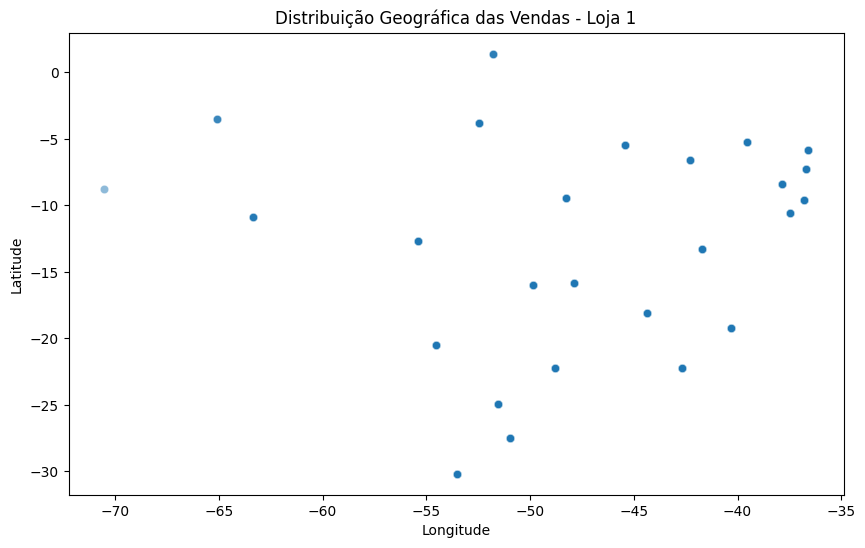

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o dataset da loja
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
loja = pd.read_csv(url)

# Verificando se as colunas "lat" e "lon" existem
if "lat" in loja.columns and "lon" in loja.columns:
    # Convertendo para numérico para evitar erros
    loja["lat"] = pd.to_numeric(loja["lat"], errors="coerce")
    loja["lon"] = pd.to_numeric(loja["lon"], errors="coerce")

    # Removendo valores nulos antes de plotar
    loja_filtrada = loja.dropna(subset=["lat", "lon"])

    if not loja_filtrada.empty:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=loja_filtrada["lon"], y=loja_filtrada["lat"], alpha=0.5)
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.title("Distribuição Geográfica das Vendas - Loja 1")
        plt.show()
    else:
        print("Erro: Não há dados válidos para criar o gráfico de dispersão.")
else:
    print("Erro: Colunas 'lat' ou 'lon' não encontradas no dataset.")

In [3]:
import folium
from folium.plugins import HeatMap

# Criando mapa base
mapa = folium.Map(location=[loja["lat"].mean(), loja["lon"].mean()], zoom_start=10)

# Adicionando Heatmap
heat_data = list(zip(loja["lat"], loja["lon"]))
HeatMap(heat_data).add_to(mapa)

# Exibir o mapa
mapa

# 📊 Análise de Desempenho das Lojas do Senhor João

## Introdução
Este projeto visa analisar o desempenho de quatro lojas com base em diversos fatores como faturamento, categorias de produtos mais vendidas, avaliações dos clientes, produtos com maior e menor saída e custo médio do frete. A partir dessas análises, buscamos identificar qual loja apresenta menor potencial de lucratividade e pode ser vendida para otimizar os investimentos.

## Objetivos do Projeto
- Calcular o **faturamento total** de cada loja.
- Identificar as **categorias de produtos mais e menos vendidas**.
- Avaliar a **satisfação dos clientes** com base nas avaliações médias.
- Analisar os **produtos mais vendidos e menos vendidos**.
- Examinar o **custo médio de frete** de cada loja.
- Explorar **dados geográficos** para entender padrões de vendas por localização.
- **Gerar visualizações gráficas** para facilitar a interpretação dos dados.

## Tecnologias Utilizadas
- **Python 3.x**
- **Pandas** (Manipulação e análise de dados)
- **Matplotlib & Seaborn** (Visualização de dados)
- **Folium** (Mapeamento interativo)
- **Jupyter Notebook** (Ambiente de execução)

## Instalação e Configuração
Para executar o projeto, siga os passos abaixo:

1. Clone este repositório:
   ```sh
   git clone https://github.com/seu-usuario/seu-repositorio.git
   ```
2. Instale as dependências:
   ```sh
   pip install pandas matplotlib seaborn folium
   ```
3. Baixe os datasets:
   Os arquivos CSV das lojas estão disponíveis nos seguintes links:
   - Loja 1: [Download](https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv)
   - Loja 2: [Download](https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv)
   - Loja 3: [Download](https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv)
   - Loja 4: [Download](https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv)

4. Execute o script de análise:
   ```sh
   python analise_lojas.py
   ```

## Visualizações Geradas
O projeto gera gráficos para facilitar a análise dos dados. Alguns dos gráficos disponíveis incluem:
- **Gráfico de Barras**: Comparação do faturamento total de cada loja.
- **Gráfico de Pizza**: Distribuição das categorias de produtos mais vendidos.
- **Gráfico de Dispersão**: Correlação entre preço e avaliações dos clientes.
- **Heatmap Geográfico**: Distribuição das vendas por coordenadas de latitude e longitude.

## Análise Geográfica (Opcional)
Caso queira explorar padrões de vendas por localização, utilize o script adicional para gerar mapas interativos. Execute:
```sh
python analise_geografica.py
```

## Conclusão
Com base nas análises realizadas, a loja **Loja 4** apresenta menor faturamento e demanda, indicando menor viabilidade econômica. A recomendação final é que essa loja seja vendida, permitindo otimizar os investimentos nas demais.

## Contribuições
Se desejar contribuir para o projeto, siga os passos:
1. Faça um fork do repositório.
2. Crie uma branch nova (`git checkout -b feature-nova`).
3. Envie um pull request.

## Licença
Este projeto está sob a licença MIT - sinta-se livre para utilizá-lo e modificá-lo conforme necessário.

---
**Desenvolvido para análise e tomada de decisão estratégica.**
